# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [22]:
df = pd.read_csv("data/weedprices01012015.csv")

In [26]:
df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096
5,Colorado,243.72,3148,195.11,2877,NaN,178
6,Connecticut,337.26,1835,267.99,2069,NaN,126
7,Delaware,364.19,490,234.72,431,NaN,41
8,District of Columbia,348.66,657,281.93,578,NaN,49
9,Florida,300.88,9369,217.05,8166,NaN,695


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [28]:
df = pd.read_csv("data/weedprices01012015.csv", na_values=["I feel bad for these guys -->"])
df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096
5,Colorado,243.72,3148,195.11,2877,NaN,178
6,Connecticut,337.26,1835,267.99,2069,NaN,126
7,Delaware,364.19,490,234.72,431,NaN,41
8,District of Columbia,348.66,657,281.93,578,NaN,49
9,Florida,300.88,9369,217.05,8166,NaN,695


In [5]:
#import numpy as np

In [27]:
#df.loc[type(df['LowQ']) == 'str', 'LowQ'] = np.nan

## Graph the top 10 least expensive states for high quality marijuana

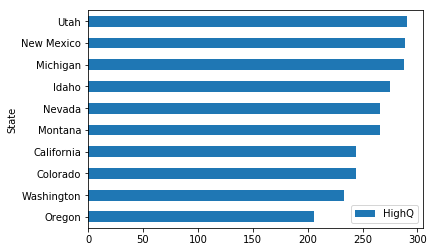

In [39]:
df.sort_values('HighQ').head(10).plot(x='State', y='HighQ', kind="barh")

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [41]:
bottom_five = df.sort_values('HighQ').head(5)
top_five = df.sort_values('HighQ').tail(5)

In [49]:
bottom_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32


In [50]:
bottom_and_top_five = pd.concat([bottom_five, top_five], ignore_index=True)
bottom_and_top_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Oregon,205.80,2179,180.90,2018,NaN,95
1,Washington,233.01,3341,189.92,3564,NaN,160
2,Colorado,243.72,3148,195.11,2877,NaN,178
3,California,243.96,16512,189.35,19151,NaN,1096
4,Montana,265.51,738,241.42,364,NaN,32
5,Iowa,364.92,975,289.05,1045,NaN,122
6,Virginia,364.95,3514,293.02,3085,NaN,285
7,Maryland,366.01,2863,255.84,2463,NaN,193
8,Vermont,371.23,357,308.86,367,NaN,32
9,North Dakota,393.94,213,339.60,327,NaN,23


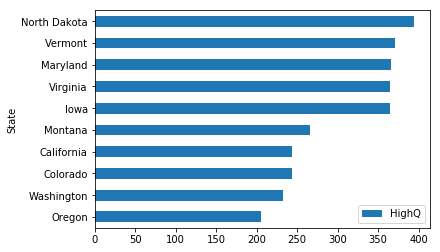

In [57]:
bottom_and_top_five_plot = bottom_and_top_five.plot(x='State', y='HighQ', kind="barh")

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

In [82]:
import matplotlib.ticker as ticker

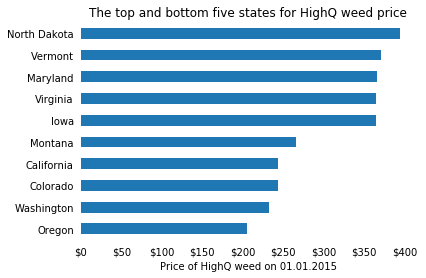

In [83]:
bottom_and_top_five_plot = bottom_and_top_five.plot(x='State', y='HighQ', kind="barh", legend=False)
bottom_and_top_five_plot.set_title("The top and bottom five states for HighQ weed price")
bottom_and_top_five_plot.set_xlabel("Price of HighQ weed on 01.01.2015")
bottom_and_top_five_plot.set_ylabel("")
bottom_and_top_five_plot.spines['top'].set_visible(False)
bottom_and_top_five_plot.spines['bottom'].set_visible(False)
bottom_and_top_five_plot.spines['left'].set_visible(False)
bottom_and_top_five_plot.spines['right'].set_visible(False)
bottom_and_top_five_plot.tick_params(axis='both', bottom='off', left='off')
bottom_and_top_five_plot.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [101]:
import glob

In [102]:
filenamelist = glob.glob("data/*.csv")

In [103]:
len(filenamelist)

491

In [104]:
filenamelist[0]

'data\\weedprices01012014.csv'

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [113]:
price_dfs = [pd.read_csv(filename, na_values=["I feel bad for these guys -->"]) for filename in filenamelist]

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [114]:
price_dfs[0][0:2]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [115]:
price_dfs[-1][0:2]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [118]:
for filename, dataframe in zip(filenamelist, price_dfs):
    dataframe['filename'] = filename

In [182]:
price_dfs[0].head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data\weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data\weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data\weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data\weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data\weedprices01012014.csv


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [121]:
df_all = pd.concat(price_dfs, ignore_index=True)

In [183]:
df_all.shape

(24990, 12)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [135]:
df_time = df_all['filename'].str.extract(r'weedprices(\d\d)(\d\d)(\d\d\d\d)', expand=True)

In [136]:
df_time.head()

,0,1,2
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014


## Okay, now add all three columns back at once

You should rename the columns first!

In [137]:
rename_dic = {
    0: 'day',
    1: 'month',
    2: 'year'
}

In [138]:
df_time.rename(columns=rename_dic, inplace=True)

In [139]:
df_time.head()

,day,month,year
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014


In [142]:
df_all = df_all.join(df_time)

In [143]:
df_all.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,day,month,year
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data\weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data\weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data\weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data\weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data\weedprices01012014.csv,01,01,2014


In [151]:
df_all['date'] = df_all['year'] + "-" + df_all['month'] + "-" + df_all['day']

In [152]:
df_all.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,day,month,year,date
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data\weedprices01012014.csv,01,01,2014,2014-01-01
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data\weedprices01012014.csv,01,01,2014,2014-01-01
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data\weedprices01012014.csv,01,01,2014,2014-01-01
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data\weedprices01012014.csv,01,01,2014,2014-01-01
4,California,$248.78,12096,$193.56,12812,$192.92,778,data\weedprices01012014.csv,01,01,2014,2014-01-01


## Plot the change in marijuana prices in Oregon over time

In [188]:
#First, we need to clean up some mess with '$'-signs in the data
#Some columns have them, others not

In [190]:
df_all['HighQ'] = df_all['HighQ'].astype(str).str.replace('\$', '')
df_all['MedQ'] = df_all['MedQ'].astype(str).str.replace('\$', '')
df_all['LowQ'] = df_all['LowQ'].astype(str).str.replace('\$', '')

In [198]:
df_all['HighQ'] = df_all['HighQ'].astype(float)
df_all['MedQ'] = df_all['MedQ'].astype(float)
df_all['LowQ'] = df_all['LowQ'].astype(float)

In [199]:
df_oregon = df_all[df_all['State'] == 'Oregon'].sort_values('date')

In [207]:
import matplotlib.dates as dates

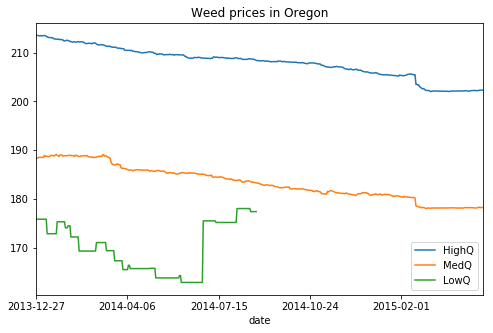

In [211]:
OR_priceplot = df_oregon.plot(x='date', y=['HighQ', 'MedQ', 'LowQ'], figsize=(8,5))
OR_priceplot.set_title("Weed prices in Oregon")

## Plot the change in marijuana prices in all states over time

In [228]:
HighQ = df_all.groupby('date')['HighQ'].mean().to_frame()
MedQ = df_all.groupby('date')['MedQ'].mean().to_frame()
LowQ = df_all.groupby('date')['LowQ'].mean().to_frame()

In [235]:
AllQ = HighQ.join(MedQ).join(LowQ)

In [240]:
AllQ.index

Index(['2013-12-27', '2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
       '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       ...
       '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
       '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23'],
      dtype='object', name='date', length=490)

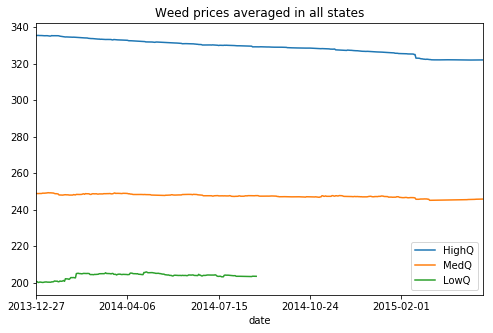

In [243]:
All_priceplot = AllQ.plot(x=AllQ.index, y=['HighQ', 'MedQ', 'LowQ'], figsize=(8,5))
All_priceplot.set_title("Weed prices averaged in all states")